# Imports

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import numpy as np
import matplotlib.pyplot as plt

# Loading the Data

## Markdown Cells

In [37]:
md_filepath = 'markdown_group.csv'
md_df = pd.read_csv(md_filepath)

In [38]:
# initial look at the data
md_df.head()

,Unnamed: 0,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,...,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,3,594,True,False,False,False,0.507588,0.044444,3.0,0.0,...,True,False,0.068182,True,1.0,True,0.000000,1.000000,1.809524,False
1,6,1222,True,False,False,False,1.000000,0.161290,1.0,0.0,...,True,True,0.333333,False,2.0,True,0.961538,1.000000,0.000000,False
2,7,1447,True,False,False,False,0.970851,0.375887,1.0,0.0,...,True,True,0.621429,True,1.0,True,0.988636,1.000000,0.000000,False
3,12,2705,True,False,False,False,1.000000,0.461538,1.0,0.0,...,True,True,0.640000,True,1.0,False,0.000000,0.923077,1.615385,False
4,15,2861,True,False,False,True,1.000000,0.461538,1.0,0.0,...,False,True,0.520000,False,1.0,False,0.000000,1.000000,6.333333,False


In [39]:
# clear the first two columns
md_df = md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [40]:
# check the data again
md_df.head()

,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,True,False,False,False,0.507588,0.044444,3.0,0.0,True,True,False,0.068182,True,1.0,True,0.000000,1.000000,1.809524,False
1,True,False,False,False,1.000000,0.161290,1.0,0.0,True,True,True,0.333333,False,2.0,True,0.961538,1.000000,0.000000,False
2,True,False,False,False,0.970851,0.375887,1.0,0.0,True,True,True,0.621429,True,1.0,True,0.988636,1.000000,0.000000,False
3,True,False,False,False,1.000000,0.461538,1.0,0.0,True,True,True,0.640000,True,1.0,False,0.000000,0.923077,1.615385,False
4,True,False,False,True,1.000000,0.461538,1.0,0.0,False,False,True,0.520000,False,1.0,False,0.000000,1.000000,6.333333,False


In [41]:
# extract the column titles
md_vars = list(md_df)
md_vars

['longer_beginning',
 'longer_ending',
 'has_author',
 'has_equation',
 'jupyter_prop',
 'markdown_prop',
 'num_contrib',
 'image_prop',
 'is_education',
 'has_links',
 'has_comments',
 'md_frequency',
 'has_title',
 'num_commits',
 'md_format',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'has_error']

## No Markdown Cells

In [42]:
no_md_filepath = 'no_markdown_group.csv'
no_md_df = pd.read_csv(no_md_filepath)

In [43]:
# clear the first two columns
no_md_df = no_md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [44]:
# initial look at the data
no_md_df.head()

,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error
0,False,0.714130,1.0,0.142857,False,False,1.0,0.00000,1.000000,1.000000,False
1,False,0.997840,1.0,0.187500,False,True,1.0,0.04878,0.789474,10.631579,True
2,False,0.121957,5.0,0.000000,False,True,11.0,0.00000,0.909091,6.181818,False
3,False,1.000000,1.0,0.000000,False,True,1.0,0.00000,1.000000,1.631579,False
4,False,0.940063,3.0,0.000000,False,True,3.0,0.12500,1.000000,1.000000,True


In [45]:
# extract the column titles
no_md_vars = list(no_md_df)
no_md_vars

['has_author',
 'jupyter_prop',
 'num_contrib',
 'image_prop',
 'is_education',
 'has_comments',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'has_error']

# K-Means Clustering

## Adjust the Data

Since k-means clustering is performed on quantitative variables, we change `True` and `False` in the data to `1` and `0`, respectively

In [46]:
# replace True with 1 in both groups
md_adjusted = md_df.replace(True, 1)
no_md_adjusted = no_md_df.replace(True, 1)

In [47]:
# replace False with 0 in both groups
md_adjusted = md_adjusted.replace(False, 0)
no_md_adjusted = no_md_adjusted.replace(False, 0)

In [48]:
# check the markdown cell group
md_adjusted.head()

,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,1.0,0.0,0.0,0.0,0.507588,0.044444,3.0,0.0,1.0,1.0,0.0,0.068182,1.0,1.0,1.0,0.000000,1.000000,1.809524,0.0
1,1.0,0.0,0.0,0.0,1.000000,0.161290,1.0,0.0,1.0,1.0,1.0,0.333333,0.0,2.0,1.0,0.961538,1.000000,0.000000,0.0
2,1.0,0.0,0.0,0.0,0.970851,0.375887,1.0,0.0,1.0,1.0,1.0,0.621429,1.0,1.0,1.0,0.988636,1.000000,0.000000,0.0
3,1.0,0.0,0.0,0.0,1.000000,0.461538,1.0,0.0,1.0,1.0,1.0,0.640000,1.0,1.0,0.0,0.000000,0.923077,1.615385,0.0
4,1.0,0.0,0.0,1.0,1.000000,0.461538,1.0,0.0,0.0,0.0,1.0,0.520000,0.0,1.0,0.0,0.000000,1.000000,6.333333,0.0


In [49]:
# check the no markdown cell group
no_md_adjusted.head()

,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error
0,0.0,0.714130,1.0,0.142857,0.0,0.0,1.0,0.00000,1.000000,1.000000,0.0
1,0.0,0.997840,1.0,0.187500,0.0,1.0,1.0,0.04878,0.789474,10.631579,1.0
2,0.0,0.121957,5.0,0.000000,0.0,1.0,11.0,0.00000,0.909091,6.181818,0.0
3,0.0,1.000000,1.0,0.000000,0.0,1.0,1.0,0.00000,1.000000,1.631579,0.0
4,0.0,0.940063,3.0,0.000000,0.0,1.0,3.0,0.12500,1.000000,1.000000,1.0


## Markdown Cells

### Standardizing the Data

In [50]:
# normalize all variables
md_stand = md_df.loc[:, md_vars].values
md_stand = StandardScaler().fit_transform(md_stand)

In [51]:
# check that the normalized data has a mean of zero and std of one
print(np.mean(md_stand), np.std(md_stand))

7.602639141268273e-17 1.0


In [52]:
# put the normalized data back into dataframe format
md_stand_df = pd.DataFrame(md_stand, columns = md_vars)

# initial look at the standardized data
md_stand_df.head()

,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,0.915797,-0.590961,-0.221343,-0.490296,-1.293088,-1.942050,0.504838,-0.960204,0.856909,1.280391,-2.838192,-1.964232,0.741665,-0.399981,1.082388,-0.410421,0.690767,-0.337021,-0.393367
1,0.915797,-0.590961,-0.221343,-0.490296,0.570932,-1.286070,-0.201473,-0.960204,0.856909,1.280391,0.352337,-0.934795,-1.348317,-0.056390,1.082388,3.185141,0.690767,-0.487356,-0.393367
2,0.915797,-0.590961,-0.221343,-0.490296,0.460589,-0.081313,-0.201473,-0.960204,0.856909,1.280391,0.352337,0.183720,0.741665,-0.399981,1.082388,3.286470,0.690767,-0.487356,-0.393367
3,0.915797,-0.590961,-0.221343,-0.490296,0.570932,0.399542,-0.201473,-0.960204,0.856909,1.280391,0.352337,0.255823,0.741665,-0.399981,-0.923883,-0.410421,0.003778,-0.353150,-0.393367
4,0.915797,-0.590961,-0.221343,2.039586,0.570932,0.399542,-0.201473,-0.960204,-1.166986,-0.781011,0.352337,-0.210071,-1.348317,-0.399981,-0.923883,-0.410421,0.690767,0.038819,-0.393367


### Performing K-Means Clustering

In [53]:
# perform k-means with multiple k to find the optimal number of clusters
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(md_stand)
    sum_of_squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Graph for Optimal k for Markdown Cell Group')

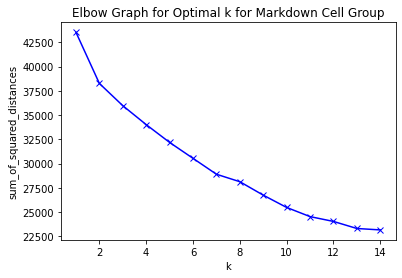

In [54]:
# plot the elbow graph
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Graph for Optimal k for Markdown Cell Group')

## No Markdown Cells

### Standardizing the Data

In [55]:
# normalize all variables
no_md_stand = no_md_df.loc[:, no_md_vars].values
no_md_stand = StandardScaler().fit_transform(no_md_stand)

In [56]:
# check that the normalized data has a mean of zero and a std of one
print(np.mean(no_md_stand), np.std(no_md_stand))

-3.909057653963651e-17 1.0


In [57]:
# put the normalized features back into dataframe format
no_md_stand_df = pd.DataFrame(no_md_stand, columns = no_md_vars)

# initial look at the standardized data
no_md_stand_df.head()

,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error
0,-0.094526,-0.686940,-0.256338,-0.263196,-0.347507,-1.451826,-0.336957,-0.425060,0.525160,-0.371956,-0.435477
1,-0.094526,0.546025,-0.256338,-0.131354,-0.347507,0.688788,-0.336957,-0.233710,-0.681648,0.365723,2.296334
2,-0.094526,-3.260437,1.489081,-0.685091,-0.347507,0.688788,6.280101,-0.425060,0.004038,0.024918,-0.435477
3,-0.094526,0.555410,-0.256338,-0.685091,-0.347507,0.688788,-0.336957,-0.425060,0.525160,-0.323583,-0.435477
4,-0.094526,0.294933,0.616371,-0.685091,-0.347507,0.688788,0.986454,0.065274,0.525160,-0.371956,2.296334


### Performing K-Means Clustering

In [58]:
# we perform k-means with multiple k to find the optimal number of clusters
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(no_md_stand)
    sum_of_squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Graph for Optimal k for No Markdown Cell Group')

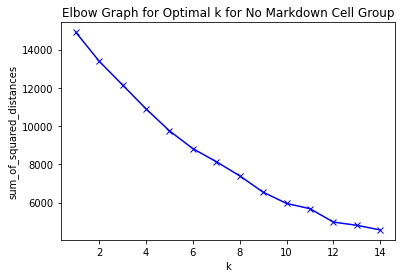

In [59]:
# plot the elbow graph
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Graph for Optimal k for No Markdown Cell Group')

# K-Prototypes Clustering

## Markdown Cells

In [76]:
# check the datatypes so we know the categorical indexes
list(enumerate(zip(list(md_df), md_df.dtypes)))

[(0, ('longer_beginning', dtype('bool'))),
 (1, ('longer_ending', dtype('bool'))),
 (2, ('has_author', dtype('bool'))),
 (3, ('has_equation', dtype('bool'))),
 (4, ('jupyter_prop', dtype('float64'))),
 (5, ('markdown_prop', dtype('float64'))),
 (6, ('num_contrib', dtype('float64'))),
 (7, ('image_prop', dtype('float64'))),
 (8, ('is_education', dtype('bool'))),
 (9, ('has_links', dtype('bool'))),
 (10, ('has_comments', dtype('bool'))),
 (11, ('md_frequency', dtype('float64'))),
 (12, ('has_title', dtype('bool'))),
 (13, ('num_commits', dtype('float64'))),
 (14, ('md_format', dtype('bool'))),
 (15, ('non_exec_prop', dtype('float64'))),
 (16, ('exec_inorder', dtype('float64'))),
 (17, ('exec_skips', dtype('float64'))),
 (18, ('has_error', dtype('bool')))]

In [62]:
# perform k-prototypes clustering with multiple k to find the optimal number of clusters
costs_md = []
K = range(1, 5)
for k in K:
    print("clustering with " + str(k) + " clusters")
    kproto = KPrototypes(n_clusters = k, init = 'Cao', verbose = 0)
    clusters = kproto.fit_predict(md_df, categorical = [0, 1, 2, 3, 8, 9, 10, 12, 14, 18])
    costs_md.append(kproto.cost_)

clustering with 1 clusters
clustering with 2 clusters
clustering with 3 clusters
clustering with 4 clusters


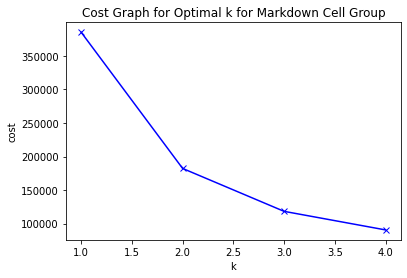

In [72]:
# plot the graph to determine the optimal number of clusters
plt.plot(K, costs_md, 'bx-')
plt.xlabel('k')
plt.ylabel('cost')
plt.title('Cost Graph for Optimal k for Markdown Cell Group')
plt.savefig('4-md-kproto.png')

In [64]:
print(costs_md)

[385204.18526386685, 182240.04344039745, 118312.59458522317, 90640.33619310697]


The code took a very long time to run on just `[1, 2, 3, 4]` clusters, so we will do more on the remote server.

## No Markdown Cells

In [67]:
# check datatypes
list(enumerate(no_md_df.dtypes))

[(0, dtype('bool')),
 (1, dtype('float64')),
 (2, dtype('float64')),
 (3, dtype('float64')),
 (4, dtype('bool')),
 (5, dtype('bool')),
 (6, dtype('float64')),
 (7, dtype('float64')),
 (8, dtype('float64')),
 (9, dtype('float64')),
 (10, dtype('bool'))]

In [68]:
# perform k-prototypes clustering with multiple k to find the optimal number of clusters
costs_no_md = []
K = range(1, 5)
for k in K:
    print("clustering with " + str(k) + " clusters")
    kproto = KPrototypes(n_clusters = k, init = 'Cao', verbose = 0)
    clusters = kproto.fit_predict(no_md_df, categorical = [0, 4, 5, 10])
    costs_no_md.append(kproto.cost_)

clustering with 1 clusters
clustering with 2 clusters
clustering with 3 clusters
clustering with 4 clusters


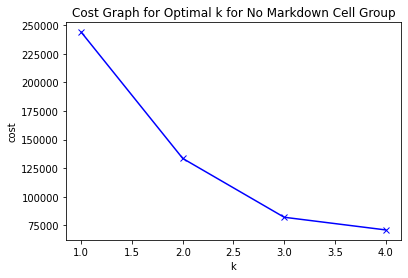

In [73]:
# plot the graph to determine the optimal number of clusters
plt.plot(K, costs_no_md, 'bx-')
plt.xlabel('k')
plt.ylabel('cost')
plt.title('Cost Graph for Optimal k for No Markdown Cell Group')
plt.savefig('4-no-md-kproto.png')

In [70]:
print(costs_no_md)

[243733.80215925732, 133482.59109233855, 82105.75379667532, 71046.60905967362]
